In [10]:
import os
import numpy as np # linear algebra
import pandas as pd # CSV file I/O and data processing
import seaborn as sns # data visualization
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

print(os.listdir('./'))

['.DS_Store', 'ML_core.py', 'video_to_imgs.py', 'README.md', 'record_video.py', 'ML_core_jupyter.ipynb', '.ipynb_checkpoints', '.git', 'main.py', 'dataframe_generator.py']


In [11]:
print(os.listdir('../data'))

['.DS_Store', 'dataframes', 'imgs', 'videos']


In [12]:
IMG_DATA_PATH = '../data/imgs'
RAW_IMG_DATA_PATH = '../data/imgs/raw'
print(os.listdir(IMG_DATA_PATH)) # careful with .DS_Store when looping

['.DS_Store', '0', '7', '6', '1', 'raw', '4', '3', '2', '5']


In [13]:
print(os.listdir('../data/dataframes'))

['.DS_Store', 'filename_to_class.csv']


In [14]:
# csv files

CSV_DATA_PATH = '../data/dataframes'

df_train = pd.read_csv(os.path.join(CSV_DATA_PATH, 'filename_to_class.csv'))

print(df_train.count())
df_train.head()

filename    1068
class       1068
dtype: int64


,filename,class
0,0-0.jpg,0
1,0-1.jpg,0
2,0-2.jpg,0
3,0-3.jpg,0
4,0-4.jpg,0


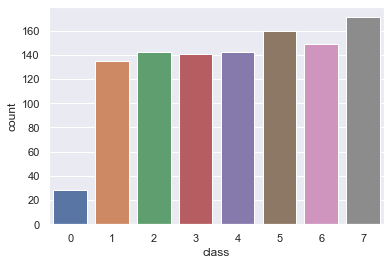

In [15]:
sns.countplot(df_train['class'])

In [37]:
# see how the imgs look
import random

random_imgs = random.sample(list(os.listdir(IMG_DATA_PATH+'/raw')), 10)
print(random_imgs)

['3-3.jpg', '3-50.jpg', '7-103.jpg', '4-21.jpg', '6-43.jpg', '4-93.jpg', '6-31.jpg', '1-11.jpg', '7-61.jpg', '3-10.jpg']


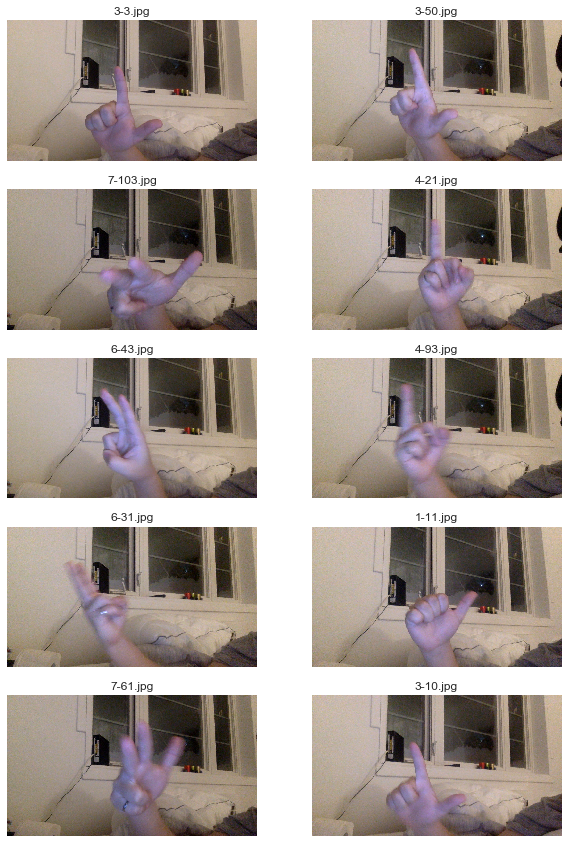

In [38]:
# looking at the imgs
from PIL import Image, ImageDraw

plt.figure(figsize=(10, 15))

for index, filename in enumerate(random_imgs):
    img = Image.open(IMG_DATA_PATH + '/raw/' + filename)

    plt.subplot(5,2,index+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(filename)


## Modeling CNN

In [67]:
from sklearn.model_selection import train_test_split

df_train['class'] = df_train['class'].astype('str')

# dropping class 0 (class 0 was just for testing)
index_to_drop = df_train[df_train['class'].apply(lambda x: x == '0')].index
df_train = df_train.drop(index_to_drop)
df_train.head()

,filename,class
5,1-0.jpg,1
6,1-1.jpg,1
7,1-2.jpg,1
8,1-3.jpg,1
9,1-4.jpg,1


In [68]:
index_list = np.arange(df_train.shape[0])
print(index_list)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [69]:
df_train['class'].value_counts()

1    59
2    56
3    50
6    46
7    42
5    41
4    39
Name: class, dtype: int64

In [70]:
class_labels = list(df_train['class'])
print(class_labels)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',

In [71]:
# applying stratification to have balanced separation between training / validation sets
train_idx, val_idx = train_test_split(
    index_list,
    stratify=class_labels,
    train_size=0.8,
    random_state=42
)

X_train = df_train.iloc[train_idx, :]
X_val = df_train.iloc[val_idx, :]

print(X_train.shape)
print(X_val.shape)

(266, 2)
(67, 2)


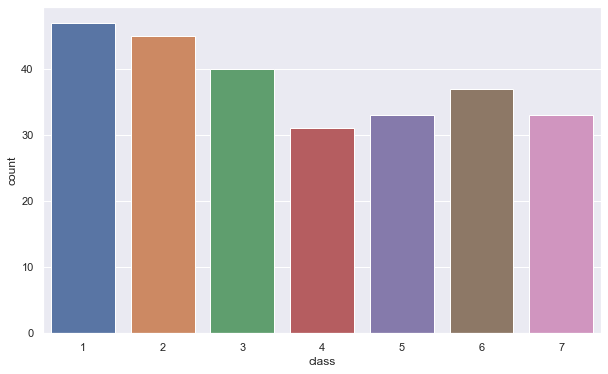

In [72]:

# check to see if stratification was successful

plt.figure(figsize=(10, 6))
plt.subplot(1,1,1)
sns.countplot(X_train['class'])

In [73]:
from keras.applications.xception import Xception
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [75]:
img_size = (299, 299)
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
epochs = 20
batch_size = 32

# define image generator configs for train and validation
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    zoom_range = 0.20,
    rotation_range = 30
)

val_datagen = ImageDataGenerator()

# create image data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe = X_train, 
    directory = IMG_DATA_PATH,
    x_col = 'filename',
    y_col = 'class',
    target_size = img_size,
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = batch_size,
    seed = 42
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=X_val, 
    directory= IMG_DATA_PATH,
    x_col = 'filename',
    y_col = 'class',
    target_size = img_size,
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle=True
)

Found 266 validated image filenames belonging to 7 classes.
Found 67 validated image filenames belonging to 7 classes.


In [84]:
from keras import regularizers

# using xception model architecture to begin
xception_model = Xception(include_top=False, weights=None, input_tensor=None, input_shape=(299,299,3))

from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, ActivityRegularization

model = Sequential()
model.add(xception_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 14343     
Total params: 20,875,823
Trainable params: 20,821,295
Non-trainable params: 54,528
_________________________________________________________________


In [85]:
from keras import optimizers

optimizer = optimizers.RMSprop(lr=0.005, rho=0.9, epsilon=None, decay=0.00000001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

In [ ]:
# training the model

import gc
    
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filepath = "model_{val_acc:.2f}_{val_loss:.4f}.h5"

ckpt = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, verbose=1, mode='auto')
reduceLR = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=3,
                             verbose=0,
                             mode='auto',
                             min_delta=0.000001,
                             cooldown=0,
                             min_lr=0)

callbackList = [ckpt, es, reduceLR]

history = model.fit_generator(
    train_generator,
    steps_per_epoch = get_steps(nb_train_samples, batch_size),
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = get_steps(nb_validation_samples, batch_size),
    callbacks = callbackList
)

gc.collect()

Epoch 1/20
